/kaggle/input/star-dataset/6 class csv.csv
Occurrence star types in dataset
0    40
1    40
2    40
3    40
4    40
5    40
Name: Star type, dtype: int64


Red                   112
Blue                   56
Blue White             41
White                  12
Yellow White           12
Yellow                  3
Orange                  2
Pale yellow orange      1
Orange-Red              1
Name: Star color, dtype: int64


       Temperature (K)  Luminosity(L/Lo)  Radius(R/Ro)  \
count       240.000000        240.000000    240.000000   
mean      10497.462500     107188.361635    237.157781   
std        9552.425037     179432.244940    517.155763   
min        1939.000000          0.000080      0.008400   
25%        3344.250000          0.000865      0.102750   
50%        5776.000000          0.070500      0.762500   
75%       15055.500000     198050.000000     42.750000   
max       40000.000000     849420.000000   1948.500000   

       Absolute magnitude(Mv)   Star type  
count     

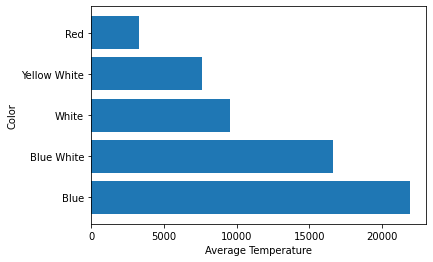

     Temperature (K)  Luminosity(L/Lo)  Radius(R/Ro)  Absolute magnitude(Mv)  \
0               3068          0.002400        0.1700                   16.12   
1               3042          0.000500        0.1542                   16.60   
2               2600          0.000300        0.1020                   18.70   
3               2800          0.000200        0.1600                   16.65   
4               1939          0.000138        0.1030                   20.06   
..               ...               ...           ...                     ...   
235            38940     374830.000000     1356.0000                   -9.93   
236            30839     834042.000000     1194.0000                  -10.63   
237             8829     537493.000000     1423.0000                  -10.73   
238             9235     404940.000000     1112.0000                  -11.23   
239            37882     294903.000000     1783.0000                   -7.80   

     Star type Star color Spectral Clas

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type
Temperature (K),1.000000,0.393404,0.064216,-0.420261,0.411129
Luminosity(L/Lo),0.393404,1.000000,0.526516,-0.692619,0.676845
Radius(R/Ro),0.064216,0.526516,1.000000,-0.608728,0.660975
Absolute magnitude(Mv),-0.420261,-0.692619,-0.608728,1.000000,-0.955276
Star type,0.411129,0.676845,0.660975,-0.955276,1.000000


In [18]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

def searchForOther(color, array): 
    for i in range(len(array)):
        if array[i,0] == color:
            return False
    return True



import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for bar graph

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
stars = pd.read_csv('/kaggle/input/star-dataset/6 class csv.csv')

print('Occurrence star types in dataset')

occur = stars['Star type'].value_counts()
print(occur)


sortedStarsTemp = stars.sort_values(by=['Temperature (K)'])
#print(sortedStarsTemp)

cleanedStars = stars.replace(['Blue-white','Blue white','Blue white ','Blue-White'], 'Blue White')
cleanedStars = cleanedStars.replace(['yellow-white', 'Yellowish White'], 'Yellow White')
cleanedStars = cleanedStars.replace(['Whitish', 'white'], 'White')
cleanedStars = cleanedStars.replace(['White-Yellow'], 'Yellow White')
cleanedStars = cleanedStars.replace(['yellowish', 'Yellowish'], 'Yellow')
cleanedStars = cleanedStars.replace(['Blue '], 'Blue')

print('\n')
print(cleanedStars['Star color'].value_counts())
print('\n')

print(cleanedStars.describe())
print('\n')

#mean of red
redTemp = 0
redCount = 0

blueTemp = 0
blueCount = 0

blueWhiteTemp = 0
blueWhiteCount = 0

whiteTemp = 0
whiteCount = 0

yellowWhiteTemp = 0
yellowWhiteCount = 0

for i in range(len(cleanedStars)):
    if (cleanedStars.iloc[i, 5] == 'Red'):
        redTemp = redTemp + cleanedStars.iloc[i, 0]
        redCount = redCount + 1
    elif (cleanedStars.iloc[i, 5] == 'Blue'):
        blueTemp = blueTemp + cleanedStars.iloc[i, 0]
        blueCount = blueCount + 1
    elif (cleanedStars.iloc[i, 5] == 'Blue White'):
        blueWhiteTemp = blueWhiteTemp + cleanedStars.iloc[i, 0]
        blueWhiteCount = blueWhiteCount + 1
    elif (cleanedStars.iloc[i, 5] == 'White'):
        whiteTemp = whiteTemp + cleanedStars.iloc[i, 0]
        whiteCount = whiteCount + 1
    elif (cleanedStars.iloc[i, 5] == 'Yellow White'):
        yellowWhiteTemp = yellowWhiteTemp + cleanedStars.iloc[i, 0]
        yellowWhiteCount = yellowWhiteCount + 1
        
redTempMean = redTemp/redCount
print('Red Mean: ')
print(redTempMean)
print('\n')

blueTempMean = blueTemp/blueCount
print('Blue Mean: ')
print(blueTempMean)
print('\n')

blueWhiteTempMean = blueWhiteTemp/blueWhiteCount
print('Blue White Mean: ')
print(blueWhiteTempMean)
print('\n')

whiteMean = whiteTemp/whiteCount
print('White Mean: ')
print(whiteMean)
print('\n')

yellowWhiteMean = yellowWhiteTemp/yellowWhiteCount
print('Yellow White Mean: ')
print(yellowWhiteMean)
print('\n')


x = np.array(["Blue", "Blue White", "White", "Yellow White", "Red"])
y = np.array([blueTempMean, blueWhiteTempMean, whiteMean, yellowWhiteMean, redTempMean])

plt.xlabel("Average Temperature")
plt.ylabel("Color")

plt.barh(x,y)
plt.show()

print(cleanedStars)

numStarColors = [[0,0,0,0,0],
                 [0,0,0,0,0],
                 [0,0,0,0,0],
                 [0,0,0,0,0],
                 [0,0,0,0,0],
                 [0,0,0,0,0]]
numStarColorsPercent = [[0,0,0,0,0],
                       [0,0,0,0,0],
                       [0,0,0,0,0],
                       [0,0,0,0,0],
                       [0,0,0,0,0],
                       [0,0,0,0,0]]

for x in range(6):
    for i in range(len(cleanedStars)):
        if (cleanedStars.iloc[i, 4] == x):
            if (cleanedStars.iloc[i,5] == 'Red'):
                numStarColors[x][0] = numStarColors[x][0] + 1
                numStarColorsPercent[x][0] = numStarColors[x][0] / redCount
            if (cleanedStars.iloc[i,5] == 'Yellow White'):
                numStarColors[x][1] = numStarColors[x][1] + 1
                numStarColorsPercent[x][1] = numStarColors[x][1] / yellowWhiteCount
            if (cleanedStars.iloc[i,5] == 'White'):
                numStarColors[x][2] = numStarColors[x][2] + 1
                numStarColorsPercent[x][2] = numStarColors[x][2] / whiteCount
            if (cleanedStars.iloc[i,5] == 'Blue White'):
                numStarColors[x][3] = numStarColors[x][3] + 1
                numStarColorsPercent[x][3] = numStarColors[x][3] / blueWhiteCount
            if (cleanedStars.iloc[i,5] == 'Blue'):
                numStarColors[x][4] = numStarColors[x][4] + 1
                numStarColorsPercent[x][4] = numStarColors[x][4] / blueCount

print('Number of colors as pertains to star type:')
print(numStarColors)
print('Star color as percentage: \n')
print(numStarColorsPercent)

cleanedStars.corr()
#print('Count for type 0')
#print(redCount)
#print(yellowWhiteCount)
#print(whiteCount)
#print(blueWhiteCount)
#print(blueCount)


# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session



Strong Correlation between star type and magnitude.